In [1]:
import numpy as np
import pandas as pd

In [6]:
#connnect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data_dir="/content/drive/MyDrive/Alzheimer_data/Alzheimer_data"

In [9]:
mild="/content/drive/MyDrive/Alzheimer_data/Alzheimer_data/Mild Dementia"

In [10]:
mod="/content/drive/MyDrive/Alzheimer_data/Alzheimer_data/Moderate Dementia"

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and preprocessing parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# Set up data generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

Found 26 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [19]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Input shape matches image dimensions
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the dense layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
#Change to number of classes
model.add(Dense(4, activation='softmax'))  # Update to match the actual number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Assuming 'train_generator' and 'validation_generator' are already defined as in your previous code

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can adjust this
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2308 - loss: 1.4007

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.2308 - loss: 1.4007 - val_accuracy: 0.2500 - val_loss: 1.4874
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2692 - loss: 1.5316 - val_accuracy: 0.0000e+00 - val_loss: 1.4231
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2692 - loss: 1.3609 - val_accuracy: 0.5000 - val_loss: 1.3841
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2308 - loss: 1.4659 - val_accuracy: 0.7500 - val_loss: 1.3680
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2692 - loss: 1.3626 - val_accuracy: 0.2500 - val_loss: 1.3895
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3846 - loss: 1.3542 - val_accuracy: 0.0000e+00 - val_loss: 1.4450
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2692 - loss: 1.4227 - val_accuracy: 0.2500 - val_loss: 1.3727
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3846 - loss: 1.3602 - val_accuracy: 0.5000 - val_loss: 1.3314
Epoch 9/10
1/1 ━━

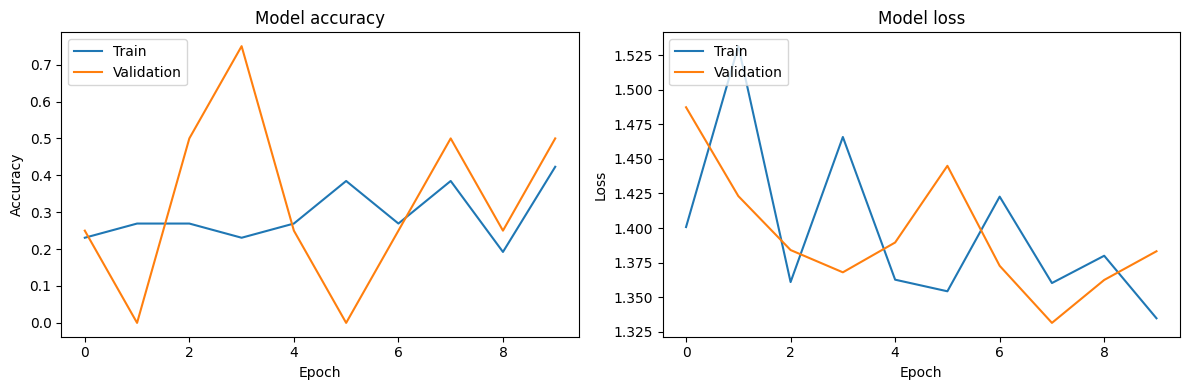

In [21]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


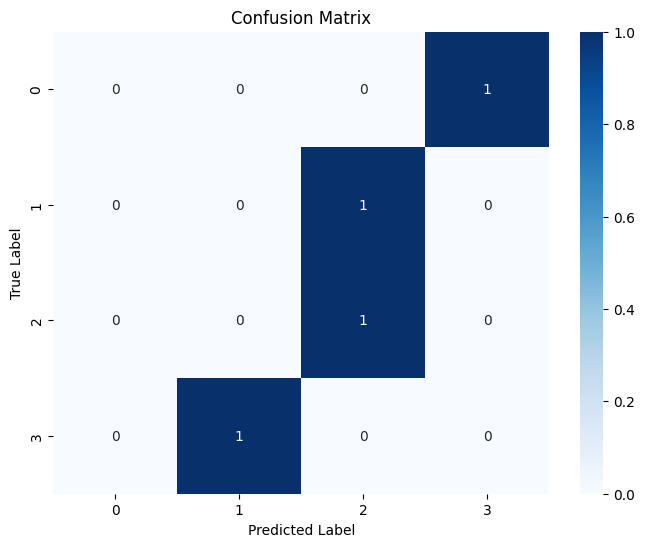

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the validation set
y_true = validation_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [24]:

# Generate classification report
class_names = list(validation_generator.class_indices.keys())  # Get class names
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

                    precision    recall  f1-score   support

     Mild Dementia       0.00      0.00      0.00         1
 Moderate Dementia       0.00      0.00      0.00         1
      Non Demented       0.50      1.00      0.67         1
Very mild Dementia       0.00      0.00      0.00         1

          accuracy                           0.25         4
         macro avg       0.12      0.25      0.17         4
      weighted avg       0.12      0.25      0.17         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


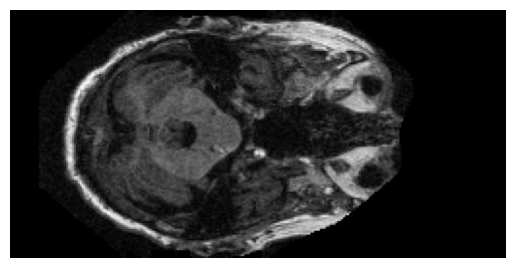

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = "/content/drive/MyDrive/Alzheimer_data/Alzheimer_data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg"
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis ticks and labels
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Predicted Class: Very mild Dementia


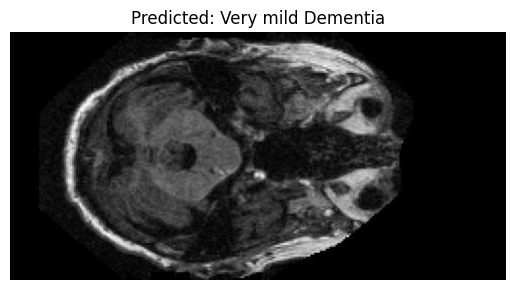

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing import image  # Import the image module

img_path = "/content/drive/MyDrive/Alzheimer_data/Alzheimer_data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg"

# Load and preprocess the image using Keras' image module
img = image.load_img(img_path, target_size=(128, 128))  # Resize during loading
img = image.img_to_array(img)  # Convert to NumPy array
img = img / 255.0  # Rescale pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction)

# Get class names
class_names = list(train_generator.class_indices.keys())  # Assuming train_generator is defined

# Print the predicted class
predicted_class = class_names[predicted_class_index]
print("Predicted Class:", predicted_class)

# Display the image
plt.imshow(mpimg.imread(img_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")  # Add title with prediction
plt.show()